# Import and todos


TODOS
- rewrite optimization functions, to pass the function and its derivatives as arguments [OK]
- reset default values for x0 to 0 [OK]
- rewrite showtrajs in single function (not priority)
- have a warning to tell if parameter alpha is too large [HARD CODE max 1000 iterations and signal error]
- entirely replace current implementation of LRGD with its rank r version
- do some testing on large synthetic regression problems OK
- change synthetic data to have LR structure OK
- Do LS with L1 norm regularizer
- Do with logistic regression
- make a verbose option for the optimization function (where they tell results in nice manner)
- Make sure LRGD and GD work exactly the same for full rank its OK just a tiny 2 iterations difference

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pylab import figure, cm
#from adjustText import adjust_text

# 2D example (visual)

## Function definition

In [2]:
H = np.array([[3,0],[0,1]])

def f(z):
    """The function to minimize"""
    return (z.T).dot(H).dot(z)

def df(z):
    """Function gradient"""
    return 2*H.dot(z)

def deltaf(z,u):
    """
    Directional gradient in direction u
    Returns : <df(z)|u> with u normalized.    
    """
    return 2*H.dot(z).dot(u)/np.linalg.norm(u)

print("f(1,1) = 3*1^2+1^2 = ", f(np.array([1,1])))
print("df(1,1) = (6x,2y) = (6,2) = ", df(np.array([1,1])))
print("deltaf((1,1),(0,1)) = 2y = ", deltaf(np.array([1,1]), np.array([0,1])))

f(1,1) = 3*1^2+1^2 =  4
df(1,1) = (6x,2y) = (6,2) =  [6 2]
deltaf((1,1),(0,1)) = 2y =  2.0


## Classic Gradient Descent

oracle calls : 26
number of iterations : 14


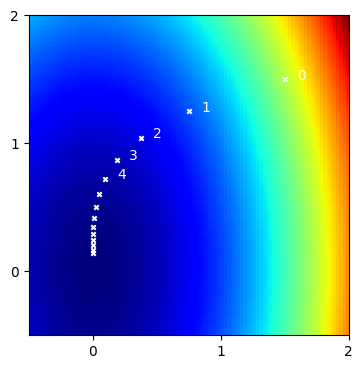

In [3]:
from visuals import show_trajs
from optim import GD

H = np.array([[3,0],[0,1]])
alpha = 1/12 # 1/6 would be optimal 
epsilon = 0.1

ZGD, CGD = GD(f,df,z0 = [1.5,1.5], epsilon = epsilon, alpha = alpha) ## 1/6 would be optimal
print("oracle calls :", np.sum(CGD))
print("number of iterations :", len(ZGD))
show_trajs(ZGD,f=f,title = "", colorbar = False)

Text(0.5, 1.0, 'In log scale')

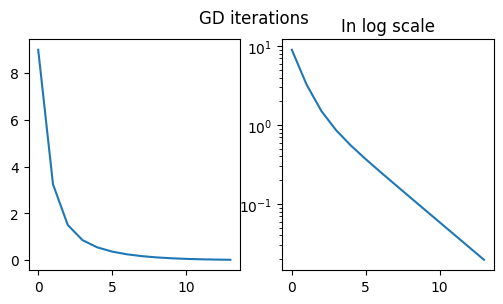

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6,3))
fig.suptitle('GD iterations')

ax1.plot([f(ZGD[i]) for i in range(len(ZGD))])

ax2.set_title("performance")
ax2.plot([f(ZGD[i]) for i in range(len(ZGD))])
ax2.set_yscale("log")
ax2.set_title("In log scale")

oracle calls :  25
number of iterations :  22


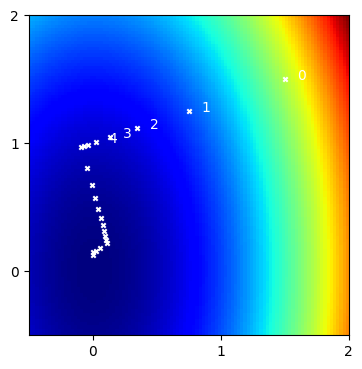

In [5]:
from optim import LRGD

ZLRGD,CLRGD = LRGD(f, deltaf,z0 = [1.5,1.5], epsilon=0.1, alpha = alpha, rank =1)
print("oracle calls : ", np.sum(CLRGD))
print("number of iterations : ", len(ZLRGD))
show_trajs(ZLRGD,f=f,title = "",colorbar = False)

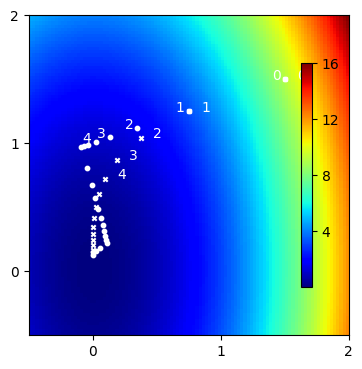

In [6]:
show_trajs(ZGD,ZLRGD,f=f,title = "",savename = "GD_LRGD.pdf",colorbar = True)

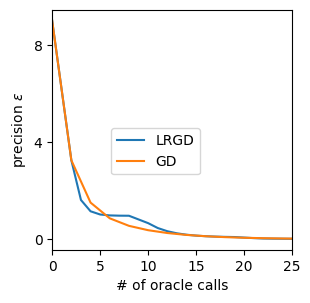

In [7]:
#### PLOT OF LRGD - by oracle call
fig, ax = plt.subplots(figsize = (3,3))
ax.plot(np.cumsum(CLRGD),[f(ZLRGD[i]) for i in range(len(ZLRGD))],label ="LRGD")
ax.plot(np.cumsum(CGD),[f(ZGD[i]) for i in range(len(ZGD))],label = "GD")
ax.set_xlim(left = 0, right = np.sum(CLRGD))
fig.legend(loc="center")
plt.xticks([0,5,10,15,20,25])
plt.yticks([0,4,8])
plt.ylabel("precision $\epsilon$")
plt.xlabel("# of oracle calls")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig("GD_LRGD_iterations.pdf")

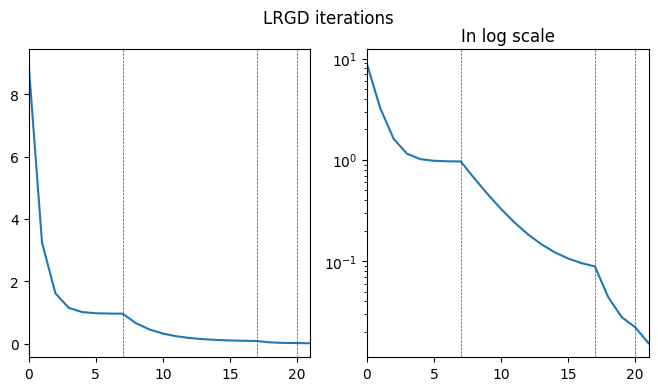

In [8]:
#### ENCAPSULATE THIS IN NICE PLOTS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))
fig.suptitle('LRGD iterations')

ax1.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])
ax1.set_xlim(left = 0, right = len(ZLRGD)-1)

ax2.set_title("performance")
ax2.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])
ax2.set_xlim(left = 0, right = len(ZLRGD)-1)
ax2.set_yscale("log")
ax2.set_title("In log scale")


for i,c in enumerate(CLRGD):
    if c==2 and i>2: 
        ax1.axvline(x = i-1, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        ax2.axvline(x = i-1, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        

# Quadratic function in higher dimension

In [15]:
H = np.array(
    [[100,0,0,0],
     [0,100,0,0],
     [0,0,1,0],
     [0,0,0,1]])

alpha = 1/100/20
p = 4

In [10]:
H = np.array(
    [[100,0],
     [0,1]])

alpha = 1/100/20
p=2

In [11]:
H = np.array(
    [[100,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]])

alpha = 1/100/20
p=4

In [16]:
ZGD,CGD = GD(f, df, z0 = np.ones(p),alpha = alpha, epsilon=0.01)
print("oracle calls : ", np.sum(CGD))

oracle calls :  13364


In [17]:
ZLRGD,CLRGD = LRGD(f, deltaf, z0 = np.ones(p),alpha = alpha, epsilon=0.01, mixed=0, rank=1)
print("oracle calls : ", np.sum(CLRGD))

oracle calls :  4152


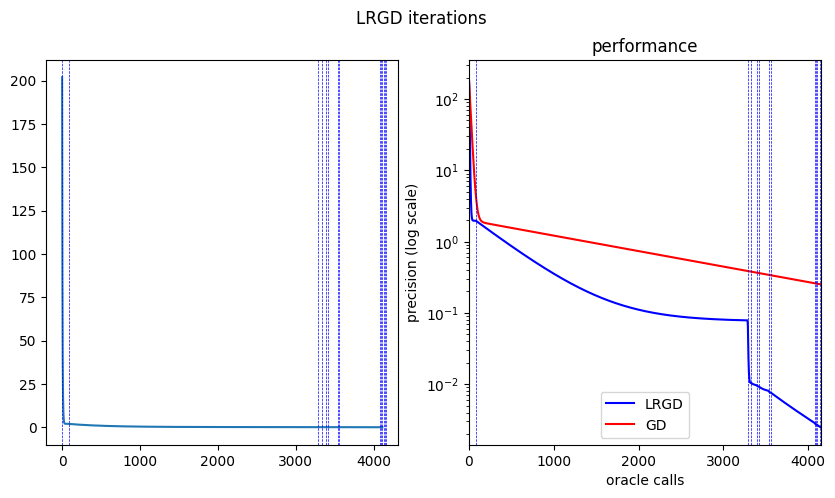

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('LRGD iterations')

ax1.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])

ax2.set_title("performance")
ax2.plot(np.cumsum(CLRGD),[f(ZLRGD[i]) for i in range(len(ZLRGD))], label ="LRGD", color="b")
ax2.plot(np.cumsum(CGD),[f(ZGD[i]) for i in range(len(ZGD))], label="GD", color ="r")
ax2.set_yscale("log")
ax2.set_ylabel("precision (log scale)")
ax2.set_xlabel("oracle calls")
ax2.set_xlim(left=0,right=np.sum(CLRGD))
ax2.legend()


for i,c in enumerate(CLRGD):
    if c==np.max(CLRGD): 
        ax1.axvline(x = np.sum(CLRGD[:i+1]), color = 'b', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        ax2.axvline(x = np.sum(CLRGD[:i+1]), color = 'b', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        

# Large scale quadratic experiments (rank = 1)

Note particular influence of low learning rate on success of LRGD

In [14]:
### NEED TO ADAPT LEARNING RATE
### alpha = 1/L where L is smoothness of gradient. i.e. max singular value


H1 = np.array([[1,0],
               [0,1]])

H2 = np.array([[1,0],
               [0,0.1]])

H3 = np.array([[1,0],
                [0,0.01]])

H4 = np.array([[1,0],
                [0,0.001]])


Hs = [H1,H2,H3,H4]

alphas = np.array([1,1, 1, 1])/2 #/2 is optimal

z0s = np.array([[1,0],
                [0.87,0.5], #sin(30)
                [0.71,0.71],#à peu près 1/sqrt(2)
                [0.5,0.87],
                [0,1]]) 

columns = [str(el) for el in Hs]
indices = [str(el) for el in z0s]
data_lrgd = np.zeros(shape = (len(indices),len(columns)))
data_gd = np.zeros(shape = (len(indices),len(columns)))
#zdata = {}

for j in range(len(Hs)): 
    for i in range(len(z0s)):
        H = Hs[j]
        ZLRGD,C = LRGD(f, deltaf,z0 = z0s[i],epsilon=0.0000001, alpha = alphas[j])
        data_lrgd[i,j] = np.sum(C)
        ZGD,C = GD(f, df,z0 = z0s[i],epsilon=0.0000001, alpha = alphas[j])
        data_gd[i,j] = np.sum(C)
        #zdata[str(i)+","+str(j)]=ZLRGD.copy()

results_lrgd = pd.DataFrame(columns = columns,index = indices, data = data_lrgd)
results_gd = pd.DataFrame(columns = columns,index = indices, data = data_gd)

results_lrgd

,[[1 0]\n [0 1]],[[1. 0. ]\n [0. 0.1]],[[1. 0. ]\n [0. 0.01]],[[1. 0. ]\n [0. 0.001]]
[1. 0.],5.0,5.0,5.0,5.0
[0.87 0.5 ],5.0,89.0,369.0,1190.0
[0.71 0.71],5.0,118.0,429.0,1536.0
[0.5 0.87],5.0,152.0,506.0,1746.0
[0. 1.],5.0,66.0,417.0,1848.0


In [15]:
results_gd

,[[1 0]\n [0 1]],[[1. 0. ]\n [0. 0.1]],[[1. 0. ]\n [0. 0.01]],[[1. 0. ]\n [0. 0.001]]
[1. 0.],2.0,2.0,2.0,2.0
[0.87 0.5 ],2.0,110.0,688.0,2302.0
[0.71 0.71],2.0,116.0,758.0,3004.0
[0.5 0.87],2.0,120.0,798.0,3410.0
[0. 1.],2.0,124.0,826.0,3688.0


# OLS Regression

### Synthetic setting

Regression :  Y[i] = X[i,:]\beta + \sigma N(0,1)


In [21]:
 #### PROBLEM DEFINITION ####
n = 50 # number of samples 
p = 10 # dimension of problem
sigma = 0.1 # noise
X = np.random.normal(size = (n,p)) # signal
beta = np.ones(shape = (p)) # signal - could be replaced  with np.random.normal(size = (p))
Y = X.dot(beta) + sigma*np.random.normal(size = (n))

 #### CLOSED FORM ####
betah, residuals, rank, s = np.linalg.lstsq(X,Y)

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X))) ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = ||Xbeta-Y||^2"""
    return np.linalg.norm(X.dot(beta)-Y)**2

def df(beta):
    return 2*X.T.dot(X.dot(beta)-Y)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

C:\Users\romai\AppData\Local\Temp\ipykernel_22512\2938026739.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  betah, residuals, rank, s = np.linalg.lstsq(X,Y)


In [22]:
print("Objective at starting point: ", f(np.zeros(p)))
print("Objective at real beta:      ", f(beta))
print("Objective at optimum:        ", f(betah))

Objective at starting point:  440.16304893100937
Objective at real beta:       0.5496524735602013
Objective at optimum:         0.4652692515709116


In [24]:
ZGD, CGD = GD(f, df, epsilon = 0.1, alpha = alpha, z0 = np.zeros(p)) ## 1/6 would be optimal
np.sum(CGD)

770

In [25]:
ZLRGD, CLRGD = LRGD(f, deltaf, epsilon=0.1, alpha = alpha, z0 = np.zeros(p), rank=p)
np.sum(CLRGD)

790

In [26]:
columns = ["rank 1", "rank 2", "rank 3", "rank 4", "rank 5", "rank 6","rank p (= GD)"]
ranks = [1,2,3,4,5,6,p]
indices = ["1/2L", "1/4L", "1/8L"]
alphas=[alpha, alpha/2,alpha/4]
data = np.zeros(shape = (len(indices),len(columns)))

for j in range(len(columns)): 
    for i in range(len(indices)):
        ZLRGD,C = LRGD(f, deltaf,z0 = np.zeros(p),epsilon=0.1, alpha = alphas[i], rank=ranks[j])
        data[i,j] = np.sum(C)

results = pd.DataFrame(columns = columns,index = indices, data = data)
results

,rank 1,rank 2,rank 3,rank 4,rank 5,rank 6,rank p (= GD)
1/2L,334.0,468.0,500.0,520.0,510.0,530.0,790.0
1/4L,560.0,862.0,947.0,996.0,975.0,1034.0,1590.0
1/8L,1017.0,1648.0,1832.0,1940.0,1910.0,2024.0,3180.0


## Planted structure

In [45]:
## PLANTED STRUCTURE

n=50
p=10
sigmaX, sigmaY = 0.0001, 0.1 #std of in-sample noise
r=4
X = 1/np.sqrt(r)*np.random.normal(size = (n,r)).dot(np.random.normal(size=(r,p))) + sigmaX*np.random.normal(size=(n,p)) 
beta = np.ones(shape = (p)) #replace with np.random.normal(size = (p))
eps = np.random.normal(size = (n))
Y = X.dot(beta) + sigmaY*eps

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X))) ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = ||Xbeta-Y||^2"""
    return np.linalg.norm(X.dot(beta)-Y)**2

def df(beta):
    return 2*X.T.dot(X.dot(beta)-Y)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

In [46]:
columns = ["rank 1", "rank 2", "rank 3", "rank 4", "rank 5", "rank 6","rank p (= GD)"]
ranks = [1,2,3,4,5,6,p]
indices = ["1/2L", "1/4L", "1/8L"]
alphas=[alpha, alpha/2,alpha/4]
data = np.zeros(shape = (len(indices),len(columns)))

for j in range(len(columns)): 
    for i in range(len(indices)):
        ZLRGD,C = LRGD(f, deltaf, z0 = np.zeros(p),epsilon=0.1, alpha = alphas[i], rank=ranks[j])
        data[i,j] = np.sum(C)

results = pd.DataFrame(columns = columns,index = indices, data = data)
results

,rank 1,rank 2,rank 3,rank 4,rank 5,rank 6,rank p (= GD)
1/2L,381.0,384.0,389.0,374.0,460.0,544.0,860.0
1/4L,592.0,714.0,746.0,718.0,890.0,1060.0,1720.0
1/8L,1059.0,1374.0,1457.0,1402.0,1745.0,2086.0,3430.0


# Least squares with L1 regularizer
 This cannot work in general (when the optimum contains 0 values) cause then the function is not bounded by a quadratic around optimum. Therefore we loose the assumptions that are required for GD with constant step size to work. 

In [60]:
n=10 
p=2
sigma = 0.1
r=4
X = 1/np.sqrt(r)*np.random.normal(size = (n,r)).dot(np.random.normal(size=(r,p))) 
beta = np.ones(shape = (p)) #replace with np.random.normal(size = (p))
#beta[0]=0 ### THIS MAKES PROGRAM FAIL !!!!!
Y = X.dot(beta) + sigma*np.random.normal(size = (n))

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X))) ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = ||Xbeta-Y||^2+||Y||_1"""
    return np.linalg.norm(X.dot(beta)-Y)**2+np.linalg.norm(beta, ord=1)

def df(beta):
    return 2*X.T.dot(X.dot(beta)-Y)+ np.sign(beta)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

In [61]:
ZGD, CGD = GD(f, df, epsilon = 0.001, alpha = alpha, z0 = np.zeros(p)) ## 1/6 would be optimal
np.sum(CGD)

50

In [62]:
ZLRGD, CLRGD = LRGD(f, deltaf,epsilon=0.001, alpha = alpha, z0 = np.zeros(p), rank=1)
np.sum(CLRGD)

50

## Logistic regression
https://www.di.ens.fr/appstat/spring-2019/lecture_notes/Lesson5_ConvexAnalysis.pdf

In [19]:
#### Useful
def logistic_function(Y):
    return 1/(1+np.exp(-Y))

def logistic_loss(u,y):
    return y*np.log(1+np.exp(-u))+(1-y)*np.log(1+np.exp(u))

### setting
n=20
p=20
sigmaX, sigmaY = 0.1, 0.1 #std of in-sample noise
r=4
X = 1/np.sqrt(r)*np.random.normal(size = (n,r)).dot(np.random.normal(size=(r,p))) + sigmaX*np.random.normal(size=(n,p)) 
beta = np.ones(shape = (p)) #replace with np.random.normal(size = (p))
Y = np.random.uniform(size=(n))< logistic_function(X.dot(beta))

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X)))/2 ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = 1/n sum_i \ell(xi.dot(beta),y_i)"""
    return np.sum([logistic_loss(X[i].dot(beta),Y[i]) for i in range(len(X))])
    
def df(beta):
    return -X.T.dot(Y - logistic_function(X.dot(beta)))

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

In [20]:
ZGD, CGD = GD(f, df, epsilon = 0.1, alpha = 0.1, z0 = np.zeros(p)) ## 1/6 would be optimal
np.sum(CGD)

2360

In [22]:
ZLRGD1, CLRGD1 = LRGD(f, deltaf,epsilon=0.1, alpha = 0.1, z0 = np.zeros(p), rank=1)
np.sum(CLRGD1)

2585

In [23]:
ZLRGD4, CLRGD4 = LRGD(f, deltaf,epsilon=0.1, alpha = 0.1, z0 = np.zeros(p), rank=4)
np.sum(CLRGD4)

636

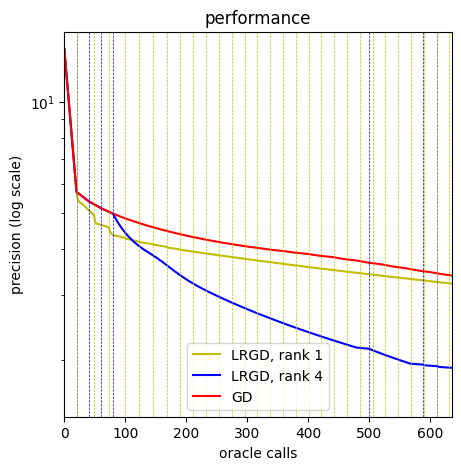

In [38]:
fig, ax2 = plt.subplots(1, 1, figsize = (5,5))


ax2.set_title("performance")
ax2.plot(np.cumsum(CLRGD1),[f(ZLRGD1[i]) for i in range(len(ZLRGD1))], label ="LRGD, rank 1", color="y")
ax2.plot(np.cumsum(CLRGD4),[f(ZLRGD4[i]) for i in range(len(ZLRGD4))], label ="LRGD, rank 4", color="b")
ax2.plot(np.cumsum(CGD),[f(ZGD[i]) for i in range(len(ZGD))], label="GD", color ="r")
ax2.set_yscale("log")
ax2.set_ylabel("precision (log scale)")
ax2.set_xlabel("oracle calls")
ax2.set_xlim(left=0,right=np.sum(CLRGD4))
ax2.legend()


for i,c in enumerate(CLRGD4):
    if c==np.max(CLRGD4): 
        ax2.axvline(x = np.sum(CLRGD4[:i+1]), color = 'b', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        
for i,c in enumerate(CLRGD1):
    if c==np.max(CLRGD1): 
        ax2.axvline(x = np.sum(CLRGD1[:i+1]), color = 'y', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        